<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EC%BC%80%EA%B8%80%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0(01_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 셀1- 한글 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

In [ ]:
# 셀2-런타임 다시시작
import os
os.kill(os.getpid(), 9)



In [ ]:
# 셀3-폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


#1.단순선형회귀

# 월급 데이터셋(월급과 근무년수의 상관관계를 분석)

https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/download?datasetVersionNumber=1

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#셀4-파일 업로드

from google.colab import files
uploaded = files.upload()

Saving 교육부_학생건강검사 결과_20151201.csv to 교육부_학생건강검사 결과_20151201.csv


In [ ]:
#셀5=-csv 파일 읽기

import pandas as pd

data = pd.read_csv('Salary_dataset.csv', encoding='cp949')


In [ ]:
# 데이터의 기본정보 출력

data




,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
data.drop('Unnamed: 0', axis=1,inplace=True)
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
#데이터 결측치 확인
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data.shape

(30, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


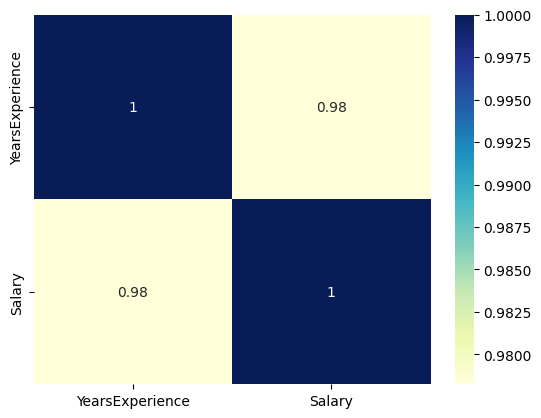

In [ ]:
# Correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함
X = data[['YearsExperience']]
y = data['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=27)

In [ ]:
X_train

9      3.8
25     9.1
12     4.1
26     9.6
0      1.2
22     8.0
23     8.3
3      2.1
6      3.1
18     6.0
4      2.3
20     6.9
14     4.6
1      1.4
10     4.0
2      1.6
17     5.4
13     4.2
5      3.0
16     5.2
28    10.4
8      3.3
24     8.8
19     6.1
Name: YearsExperience, dtype: float64

In [ ]:
X_test

29    10.6
15     5.0
11     4.1
7      3.3
21     7.2
27     9.7
Name: YearsExperience, dtype: float64

In [ ]:
y_train

7079     71.5
8794     59.7
5301     47.0
1930     59.9
4920     60.0
        ...  
7196    102.9
4852     48.1
3916     63.9
3772     45.2
5143     48.9
Name: 몸무게, Length: 7745, dtype: float64

In [ ]:
y_test

5851    60.0
9362    51.2
9164    68.6
3968    60.0
1737    32.0
        ... 
4395    49.6
469     47.6
5605    54.0
4922    52.7
3625    56.2
Name: 몸무게, Length: 1937, dtype: float64

In [ ]:
#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression

my_lig=LinearRegression()

#데이터 학습시키기
my_lig.fit(X_train, y_train)

#학습 결과(추세선) 확인하기
print(my_lig.coef_)
print(my_lig.intercept_)

[9521.86181456]
25113.7053215282


In [ ]:
#작성한 모델로 예측 해보기
my_lig.predict([[16]])

array([177463.49435445])

In [ ]:
#군무연수를 입력받아 월급을 예측해보기
yy=float(input('근무 연수 : '))
print('예상 월급 : %.1f' %my_lig.predict([[yy]]))

근무 연수 : 11.2
예상 월급 : 131758.6


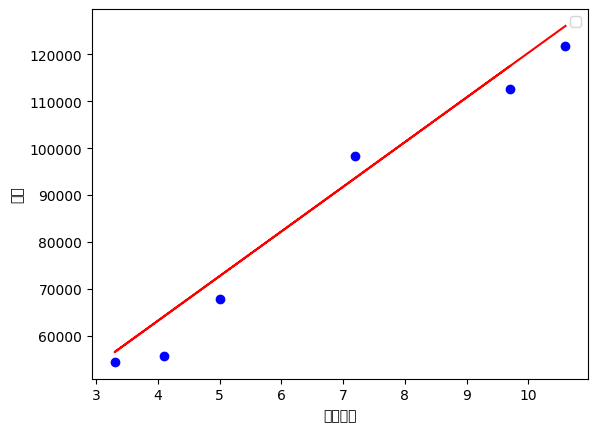

In [ ]:
# 전체 테스트데이터의 예측값을 y_pred에 저장하고 선형회귀 모델 평가하기
y_pred=my_lig.predict(X_test)

# 테스트 데이터의 실제값 : 파란색 산점도
plt.plot(X_test, y_test, 'bo')

# 테스트 데이터의 예측값 : 빨간색 선 그래프
plt.plot(X_test, y_pred,'r')

plt.xlabel('군무년수')
plt.ylabel('월급')
plt.legend()
plt.show()

In [ ]:
#모델 평가하기
print('이 모델의 정확도는 %.1f %%입니다,'%(my_lig.score(X_test, y_test)*100))

이 모델의 정확도는 96.4 %입니다,


#2. 다중선형회귀

자동차 가격에 영향을 미치는 속성을 다양하게 분석하여 가격을 예측해봄  

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/download?datasetVersionNumber=1


https://www.kaggle.com/code/hasangrkemyaar/car-price-prediction-multiple-linear-reg

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<ipython-input-16-34d760657347>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True);


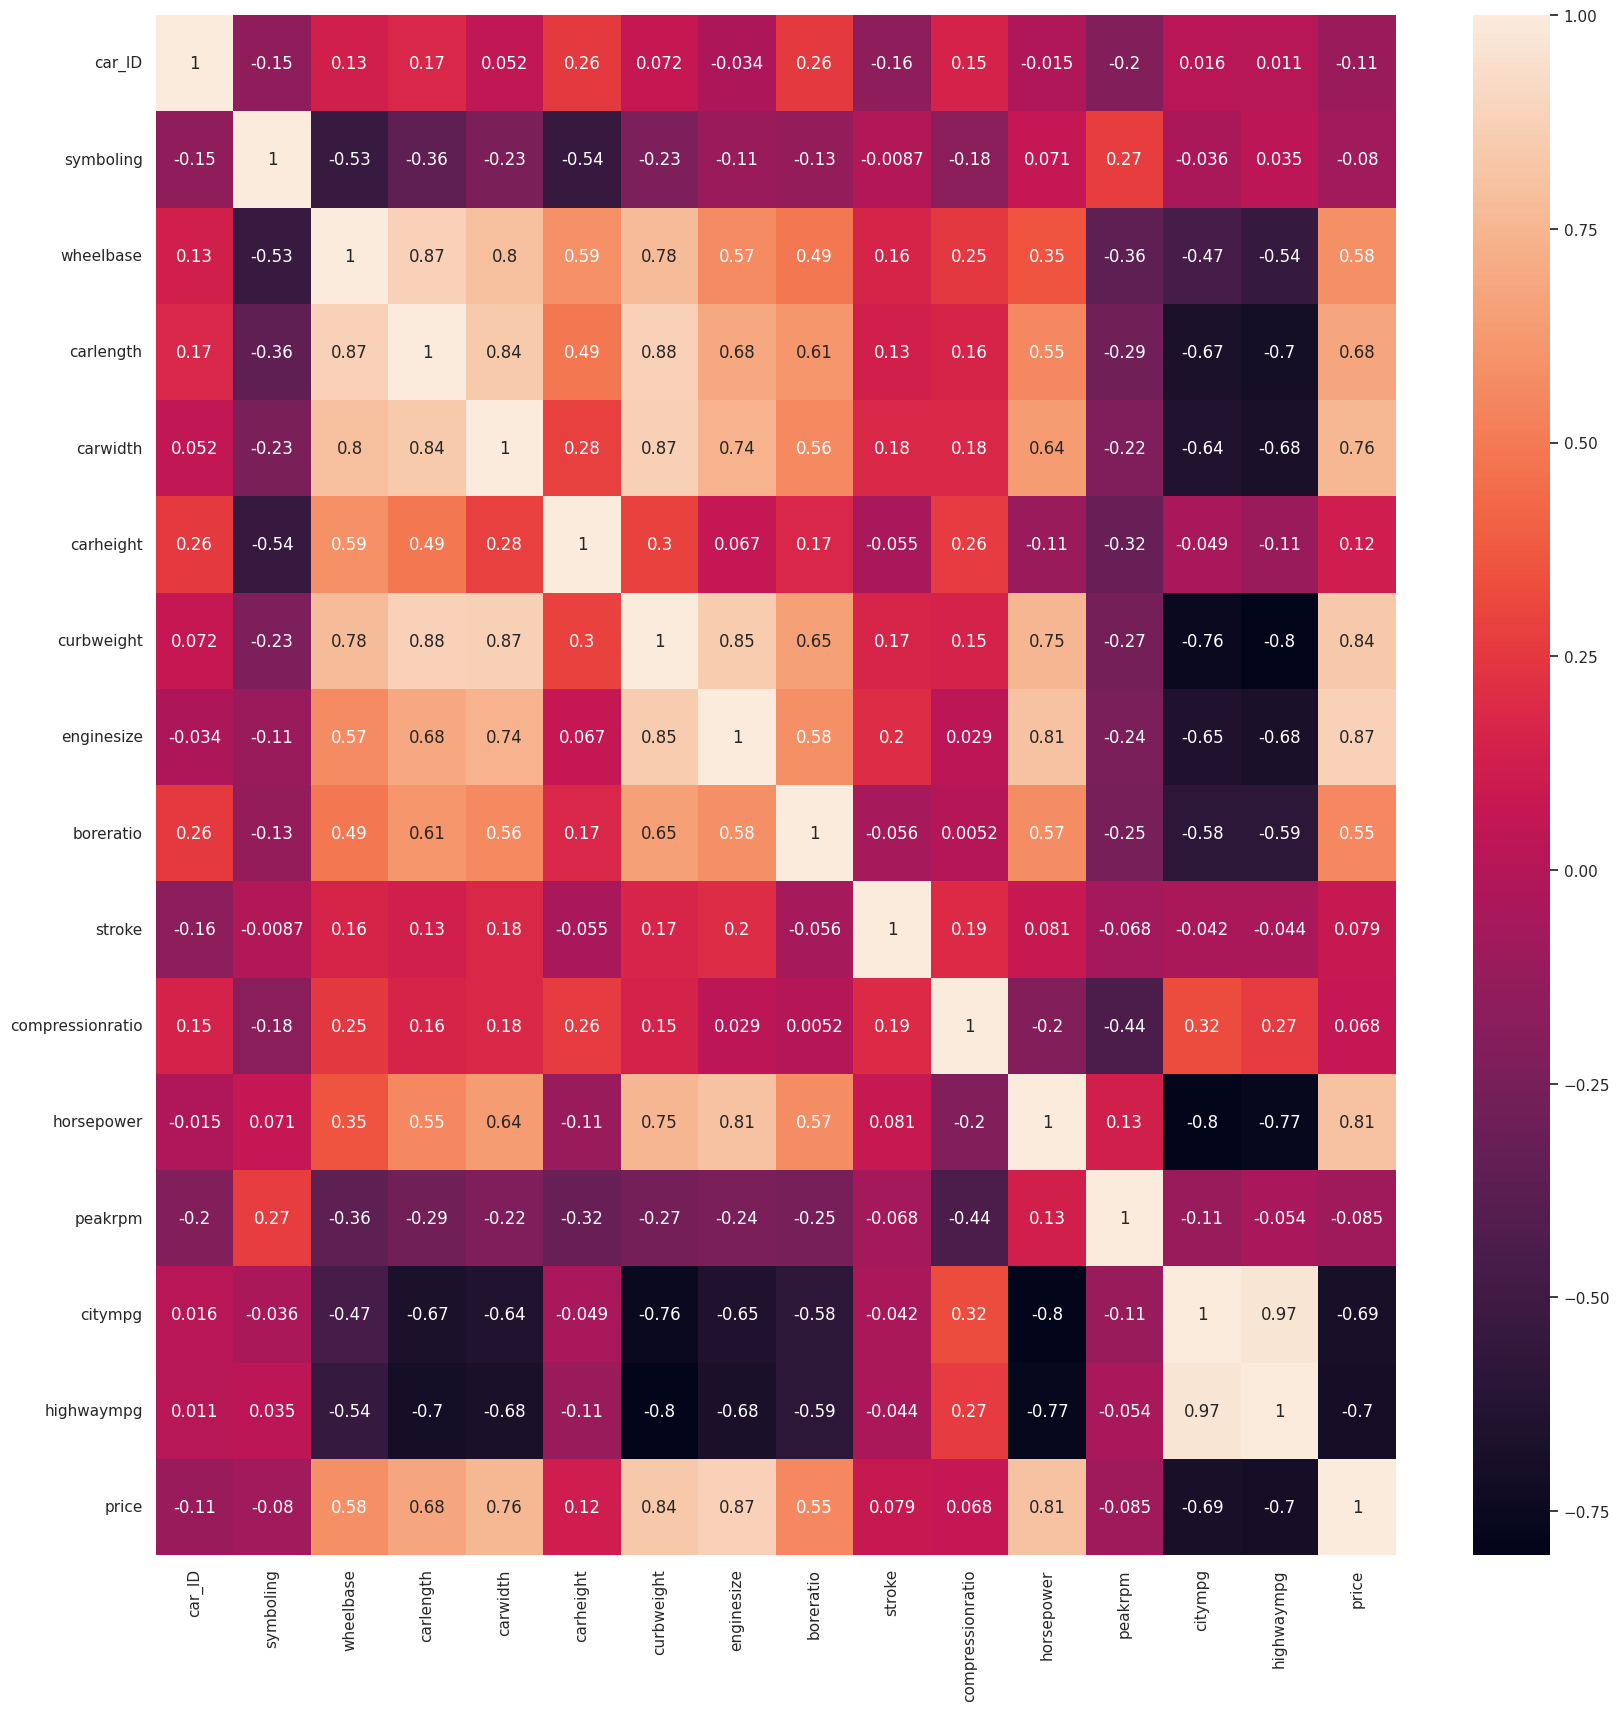

In [ ]:
# Correlation between different variables.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True);

In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함
X = df[['enginesize', 'horsepower']] #속성 2개
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=27)

In [ ]:
#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression

my_lig2=LinearRegression()

#데이터 학습시키기
my_lig2.fit(X_train, y_train)

#학습 결과(추세선) 확인하기
print(my_lig2.coef_)
print(my_lig2.intercept_)

[120.65639168  62.20892616]
-8386.944678074975


In [ ]:
#모델 평가하기
print('이 모델의 정확도는 %.1f %%입니다,'%(my_lig2.score(X_test, y_test)*100))

이 모델의 정확도는 81.4 %입니다,


In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함
X = df[['curbweight','enginesize', 'horsepower']]  #속성3개
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=27)

In [ ]:
#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression

my_lig3=LinearRegression()

#데이터 학습시키기
my_lig3.fit(X_train, y_train)

#학습 결과(추세선) 확인하기
print(my_lig3.coef_)
print(my_lig3.intercept_)

[ 3.92329585 86.67883443 53.72387825]
-13198.535014796918


In [ ]:
#모델 평가하기
print('이 모델의 정확도는 %.1f %%입니다,'%(my_lig3.score(X_test, y_test)*100))

이 모델의 정확도는 85.3 %입니다,
